In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F

from tqdm import tnrange
from sklearn.decomposition import non_negative_factorization

In [9]:
v = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")
dv = np.diff(v)

high_dv = np.zeros((dv.shape[0]-1))

for i in tnrange(dv.shape[0] - 1):
    if dv[i] >= 0.04:
        neg_count = 0
        for j in range(10):
            if dv[i+j] <= -0.015:
                neg_count += 1
        if neg_count > 0:
            high_dv[i] += 1
        
print(np.where(high_dv == 1)[0].size)

high_dv_diff = np.diff(high_dv)
unique_high_dv = np.zeros((high_dv_diff.shape[0]))
for i in range(high_dv_diff.shape[0]):
    if high_dv_diff[i] == 1:
        unique_high_dv[i-5] += 1
print(np.sum(unique_high_dv))

<ipython-input-9-d9c904d7871b>:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(dv.shape[0] - 1):



2865
440.0


Text(0.5, 1.0, 'dV/dt')

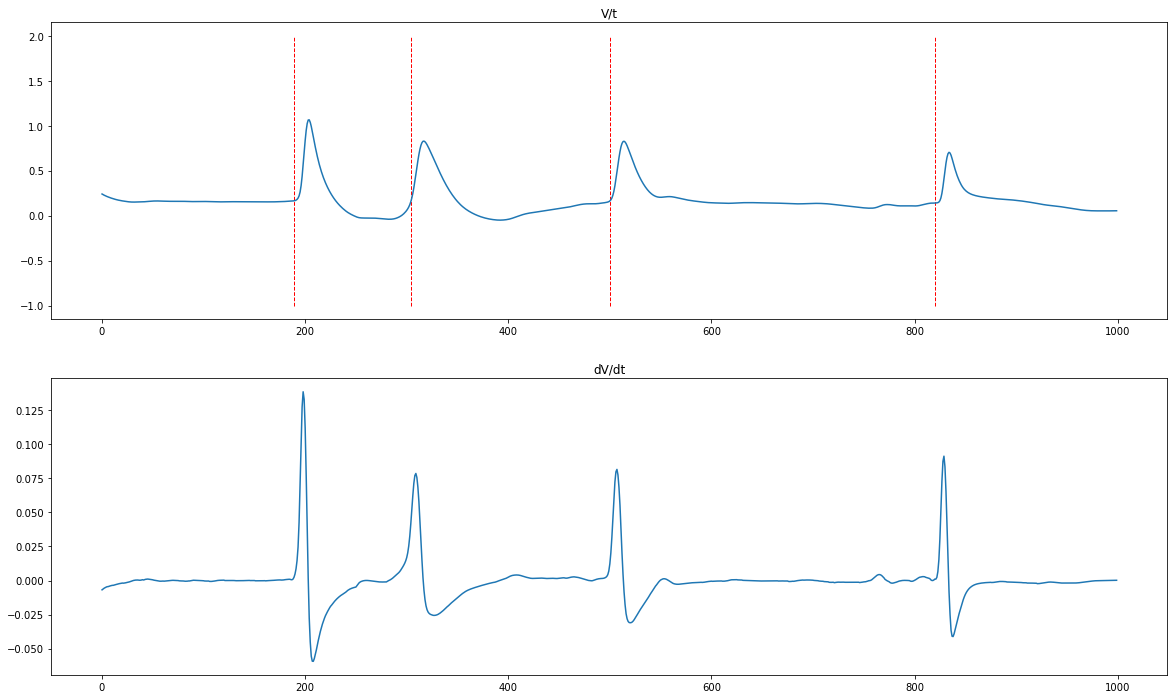

In [17]:
fig, axs = plt.subplots(nrows=2, figsize = (20,12))
axs[0].plot(v[100000:150000][22500:23500])
axs[0].vlines(np.where(unique_high_dv[100000:150000][22500:23500]==1)[0], ymin=-1,ymax=2, color="red", linewidth=1, linestyle="--")
axs[1].plot(dv[100000:150000][22500:23500])
axs[0].set_title("V/t")
axs[1].set_title("dV/dt")


Text(0.5, 1.0, 'dV/dt')

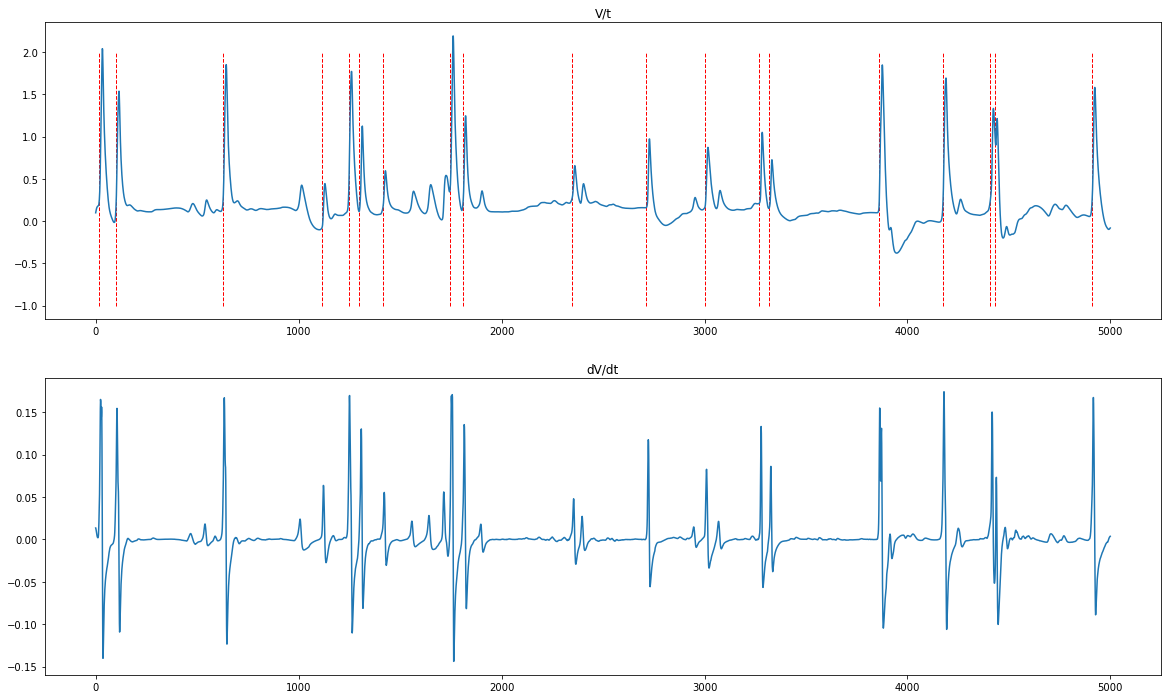

In [16]:
fig, axs = plt.subplots(nrows=2, figsize = (20,12))
axs[0].plot(v[:50000][20000:25000])
axs[0].vlines(np.where(unique_high_dv[:50000][20000:25000]==1)[0], ymin=-1,ymax=2, color="red", linewidth=1, linestyle="--")
axs[1].plot(dv[:50000][20000:25000])
axs[0].set_title("V/t")
axs[1].set_title("dV/dt")


In [58]:
basis_no = 81
T_max = 501

basis = np.zeros((basis_no, T_max))
points = np.arange(0,5*basis_no,5)
for i in range(basis_no):
    point = points[i]
    raw = np.arange(T_max)
    part = np.exp(-(raw - point)**2/30)
    basis[i] = part

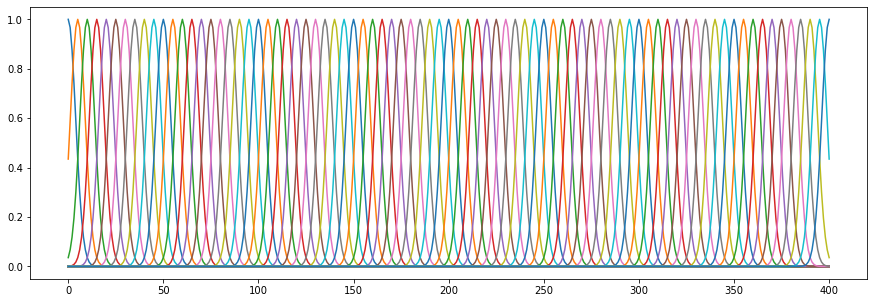

In [59]:
plt.figure(figsize = (15,5))
for i in range(basis_no):
    plt.plot(basis[i], label=str(i))
#plt.legend()



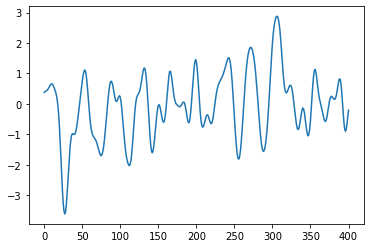

In [60]:
plt.plot(np.sum(basis * np.random.randn(basis_no, 1), 0))

In [11]:
cos_basis_no = 20
T_max = 500

In [12]:
hist_basis = np.zeros((cos_basis_no, T_max))
for i in range(cos_basis_no):
    phi = 1.5707963267948966*i
    xmin = phi - 3.141592653589793
    xmax = phi + 3.141592653589793

    x_in = np.arange(0, T_max, 1)
    raw_cos = 5  * np.log(x_in + 1 + 1e-7)

    basis = 0.5*np.cos(raw_cos - phi) + 0.5
    basis[raw_cos < xmin] = 0.0
    basis[raw_cos > xmax] = 0.0
    hist_basis[i] = hist_basis[i] + basis

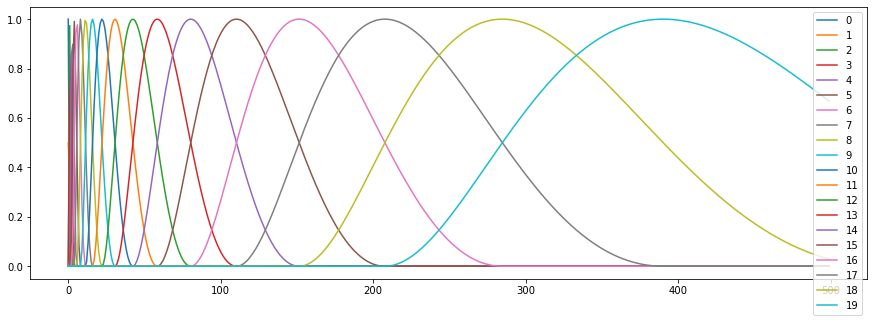

In [13]:
plt.figure(figsize = (15,5))
for i in range(cos_basis_no):
    plt.plot(hist_basis[i], label=str(i))
plt.legend()
    
#plt.xlim(-T_max,T_max)
#plt.xlim(0,50)

In [20]:
obs_basis_no = 15
T_max = 401
scale = 4
shift = 1

In [21]:
obs_basis = np.zeros((obs_basis_no*2-1, 2*T_max+1))
for i in range(obs_basis_no):
    phi = 1.5707963267948966*i
    xmin = phi - 3.141592653589793
    xmax = phi + 3.141592653589793
    if i == 0:
        x_in = np.arange(-T_max, T_max+1, 1)
        raw_cos = scale  * np.log(np.abs(x_in) + shift + 1e-7)
        basis = 0.5*np.cos(raw_cos - phi) + 0.5
        basis[raw_cos < xmin] = 0.0
        basis[raw_cos > xmax] = 0.0
        obs_basis[i] = basis
        
    else:
        x_in_pos = np.arange(0,T_max+1,1)
        x_in_neg = np.arange(-T_max,1,1)
        raw_cos_pos = scale  * np.log(np.abs(x_in_pos) + shift + 1e-7)
        raw_cos_neg = scale  * np.log(np.abs(x_in_neg) + shift + 1e-7)
        pos_basis = 0.5*np.cos(raw_cos_pos - phi)+ 0.5
        neg_basis = 0.5*np.cos(raw_cos_neg - phi)+ 0.5
        
        pos_basis[raw_cos_pos < xmin] = 0.0
        pos_basis[raw_cos_pos > xmax] = 0.0
        neg_basis[raw_cos_neg < xmin] = 0.0
        neg_basis[raw_cos_neg > xmax] = 0.0
        
        obs_basis[i*2-1,T_max:] = pos_basis
        obs_basis[i*2,:T_max+1] = neg_basis

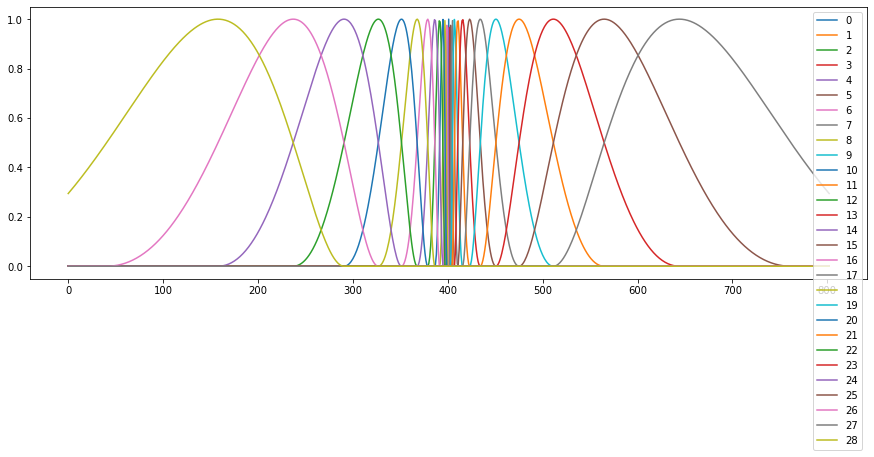

In [22]:
plt.figure(figsize = (15,5))
for i in range(obs_basis_no*2-1):
    plt.plot(obs_basis[i], label=str(i))
plt.legend()
    
#plt.xlim(-T_max,T_max)
#plt.xlim(40,60)

In [2]:
loc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/spk_loc.npy")
v = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")[:,:50000].flatten()

(-70.0, -55.0)

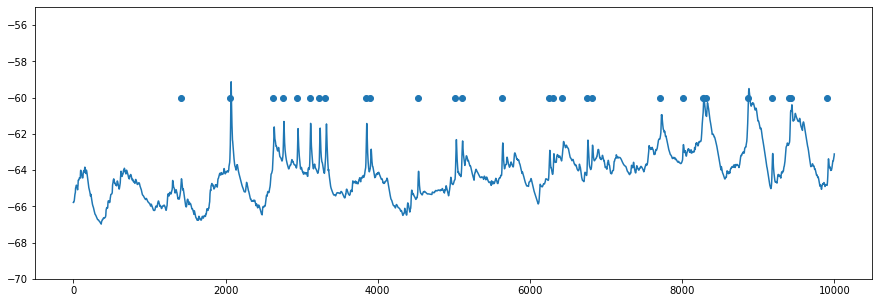

In [3]:
plt.figure(figsize=(15,5))
plt.plot(v[15000:25000])
plt.scatter(np.arange(10000), loc[15000:25000]*-60)
plt.ylim(-70,-55)

(0.8, 1.2)

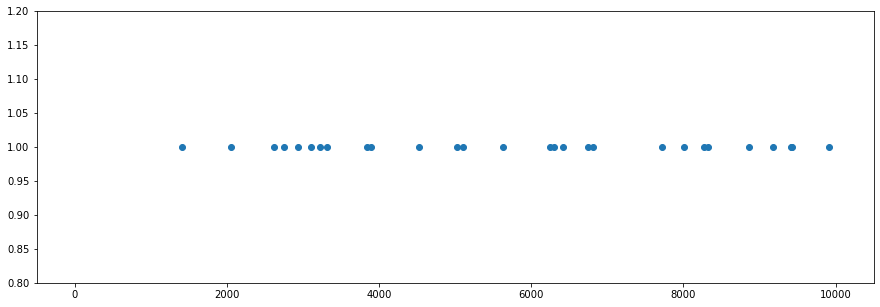

In [4]:
plt.figure(figsize=(15,5))

plt.scatter(np.arange(10000), loc[15000:25000])
plt.ylim(0.8,1.2)

In [11]:
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")
iloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy")

In [18]:
clust_dend = np.unique(eloc[880:1120,0])
print(clust_dend)

[ 8. 13. 36. 59.]


In [21]:
C_den = np.zeros((10,10))
C_den[0,1:] = 1

C_syn_e = np.zeros((10,2000))
C_syn_i = np.zeros((10,200))

C_syn_e[6,880:940] = 1
C_syn_e[7,940:1000] = 1
C_syn_e[8,1000:1060] = 1
C_syn_e[9,1060:1120] = 1

for i in range(2000):
    if (i<880) or (i>=1120):  
        dend = eloc[i,0]
        if dend <= 15:
            C_syn_e[1,i] = 1
        elif (dend >= 16) & (dend <= 46):
            C_syn_e[2,i] = 1
        elif (dend >= 47) & (dend <= 61):
            C_syn_e[3,i] = 1
        elif (dend >= 62) & (dend <= 74):
            C_syn_e[4,i] = 1
        elif dend >= 75:
            C_syn_e[5,i] = 1

for i in range(200):
    dend = iloc[i,0]
        
    if dend < 0:
        C_syn_i[0,i] = 1
    elif (dend > 0) & (dend <= 15):
        C_syn_i[1,i] = 1
    elif (dend >= 16) & (dend <= 46):
        C_syn_i[2,i] = 1
    elif (dend >= 47) & (dend <= 61):
        C_syn_i[3,i] = 1
    elif (dend >= 62) & (dend <= 74):
        C_syn_i[4,i] = 1
    elif dend >= 75:
        C_syn_i[5,i] = 1

In [30]:
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub10_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub10_C_syn_i.npy", C_syn_i)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub10_C_den.npy", C_den)

In [27]:
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")
iloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")

In [30]:
#C_den = np.zeros((4,4))
#C_den[0,1:] = 1
e_den_idx = np.unique(eloc[880:1120,0])

C_syn_e = np.zeros((4,2000))
C_syn_i = np.zeros((4,200))

for i in range(4):
    e_idx = np.where(eloc[:,0] == e_den_idx[i])[0]
    C_syn_e[i,e_idx] = 1
    
    i_idx = np.where(iloc[:,0] == e_den_idx[i])[0]
    C_syn_i[i,i_idx] = 1
    
#root_i_idx = np.where(iloc[:,0] == -1)[0]
#C_syn_i[0,root_i_idx] = 1
    

In [10]:
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub4_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub4_C_syn_i.npy", C_syn_i)
#np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub5_C_den.npy", C_den)

In [22]:
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")
iloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")
#e_in = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npy")

In [3]:
C_den_deep = np.zeros((9,9))
C_den_flat = np.zeros((9,9))
den_idx = np.unique(eloc[880:1120,0])

C_syn_e = np.zeros((9,2000))
C_syn_i = np.zeros((9,200))

for i in range(8):
    if i%2 == 0:
        e_idx = np.where((eloc[:,0]==den_idx[i//2]) & (eloc[:,1]<0.5))[0]
        i_idx = np.where((iloc[:,0]==den_idx[i//2]) & (iloc[:,1]<0.5))[0]
    else:
        e_idx = np.where((eloc[:,0]==den_idx[i//2]) & (eloc[:,1]>=0.5))[0]
        i_idx = np.where((iloc[:,0]==den_idx[i//2]) & (iloc[:,1]>=0.5))[0]

    C_syn_e[i+1,e_idx] = 1
    C_syn_i[i+1,i_idx] = 1
    
C_den_flat[0,1:] = 1

prox = np.arange(1,8,2)
dist = np.arange(2,9,2)

C_den_deep[0,prox] = 1
C_den_deep[1,2] = 1
C_den_deep[3,4] = 1
C_den_deep[5,6] = 1
C_den_deep[7,8] = 1

In [4]:
print(C_den_deep)

[[0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub9_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub9_C_syn_i.npy", C_syn_i)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub9_C_den_flat.npy", C_den_flat)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub9_C_den_deep.npy", C_den_deep)

In [17]:
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")
iloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")


In [18]:
sub_no = 153
#C_den = np.zeros((sub_no, sub_no))
C_syn_e = np.zeros((sub_no, 2000))
C_syn_i = np.zeros((sub_no, 200))

#C_den[0,1:] = 1

e_den = eloc[:,0]
i_den = iloc[:,0]
i_den[i_den == -1] = 0

for i in range(2000):
    e_idx = int(e_den[i])
    C_syn_e[e_idx,i] = 1
    
for i in range(200):
    i_idx = int(i_den[i])
    C_syn_i[i_idx,i] = 1

In [19]:
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub153_C_syn_e.npy", C_syn_e)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub153_C_syn_i.npy", C_syn_i)
#np.save("/media/hdd01/sklee/CA1_clust4-60/data/handsub153_C_den.npy", C_den)

In [16]:
v = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")


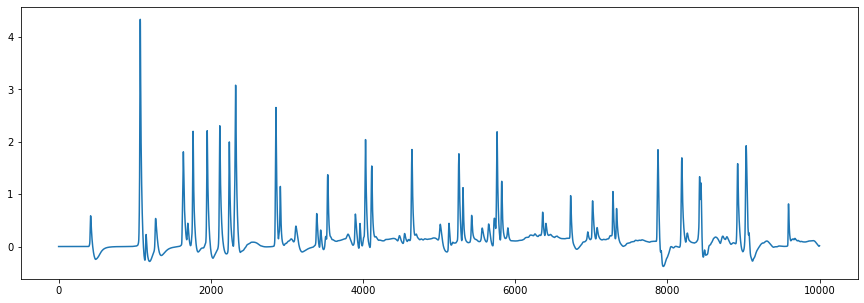

In [17]:
plt.figure(figsize = (15,5))
plt.plot(v[16000:26000])

In [18]:
v[v < 0.5] = 0

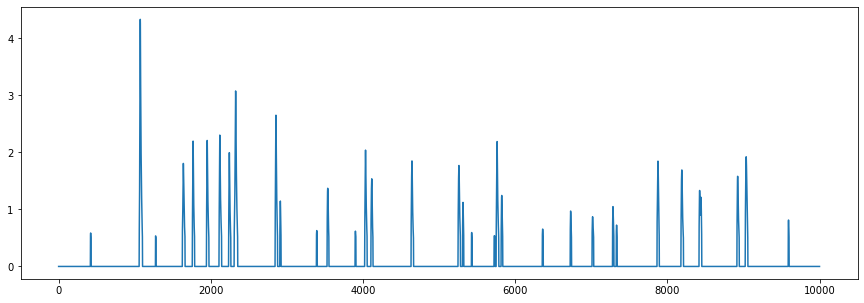

In [19]:
plt.figure(figsize = (15,5))
plt.plot(v[16000:26000])

In [20]:
spk_loc = np.zeros((v.shape[0]))

for i in range(v.shape[0]-1):
    if v[i] == 0:
        if v[i+1] > 0:
            spk_loc[i] = 1

In [21]:
print(np.sum(spk_loc))

403.0


In [22]:
np.save("/media/hdd01/sklee/CA1_clust4-60/data/spk_loc.npy", spk_loc)

In [5]:
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")
iloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep150_stimseed1.npy")

In [6]:
e_den = np.unique(eloc[:,0])
i_den = np.unique(iloc[:,0])

e_ord = np.zeros(eloc.shape[0])
i_ord = np.zeros(iloc.shape[0])

e_count = 0
i_count = 0

for e in range(e_den.shape[0]):
    den = e_den[e]
    chosen_e = eloc[np.where(eloc[:,0] == den)[0]]
    chosen_e_idx = np.where(eloc[:,0] == den)[0]
    ord_chosen_e = chosen_e[np.argsort(chosen_e[:,1])]
    ord_chosen_e_idx = chosen_e_idx[np.argsort(chosen_e[:,1])]
    chosen_no = chosen_e.shape[0]
    e_ord[e_count:e_count+chosen_no] = ord_chosen_e_idx
    e_count += chosen_no

for i in range(i_den.shape[0]):
    den = i_den[i]
    chosen_i = iloc[np.where(iloc[:,0] == den)[0]]
    chosen_i_idx = np.where(iloc[:,0] == den)[0]
    ord_chosen_i = chosen_i[np.argsort(chosen_i[:,1])]
    ord_chosen_i_idx = chosen_i_idx[np.argsort(chosen_i[:,1])]
    chosen_no = chosen_i.shape[0]
    i_ord[i_count:i_count+chosen_no] = ord_chosen_i_idx
    i_count += chosen_no

In [8]:
np.save("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_ord.npy", e_ord)
np.save("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_ord.npy", i_ord)

In [2]:
Z = np.load("/media/hdd01/sklee/CA1_clust4-60/data/spk_loc.npy")
E = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npy")

In [3]:
E_torch = torch.from_numpy(E).T.unsqueeze(0).float()
t = torch.arange(0,501).float()
tau = 20
kern = torch.exp(-(t-250.5)**2/tau)
kern = kern.reshape(1,1,-1).repeat(E.shape[1],1,1)

E_conv = F.conv1d(E_torch, kern, padding=250,groups=E.shape[1]).squeeze(0).T
E_conv = E_conv.cpu().detach().numpy()


In [4]:
T = 250
Z_no = int(np.sum(Z))

##
#E_conv = E
##

sta_raw = np.zeros((Z_no,T,E.shape[1]))
count = 0

for i in tnrange(Z.shape[0]):
    if Z[i] == 1:
        window = E_conv[i-T:i]
        sta_raw[count] = window
        count += 1

sta = np.sum(sta_raw, 0)

<ipython-input-4-919f111497cb>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(Z.shape[0]):


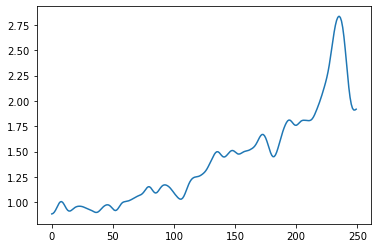

In [18]:
temp = np.mean(sta[:,880:1120], 1)
plt.plot(temp)

In [21]:
spatial = np.matmul(temp, sta_raw)

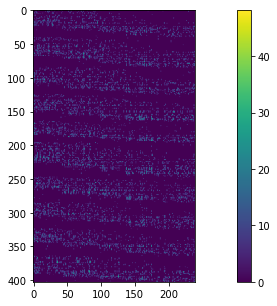

In [26]:
plt.figure(figsize= (15,5))
plt.imshow(spatial[:,880:1120])
plt.colorbar()

In [65]:
sub_no = 4
W, H, n_iter = non_negative_factorization(spatial[:,:], n_components=sub_no, init='random', random_state=0)

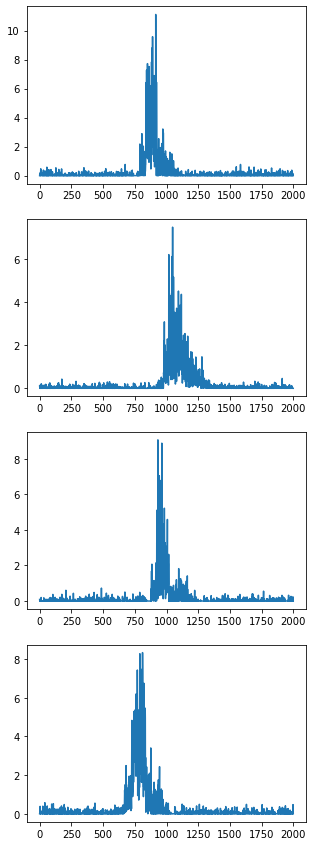

In [67]:
fig, axs = plt.subplots(nrows=sub_no, figsize = (5,15))
for i in range(sub_no):
    axs[i].plot(H[i])

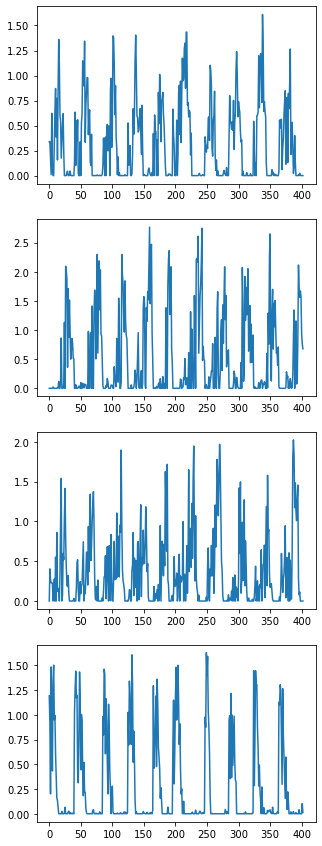

In [68]:
fig, axs = plt.subplots(nrows=sub_no, figsize = (5,15))
for i in range(sub_no):
    axs[i].plot(W[:,i])

In [16]:
v = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")
new_v = np.copy(v)
new_v[new_v < 0.5] = 0

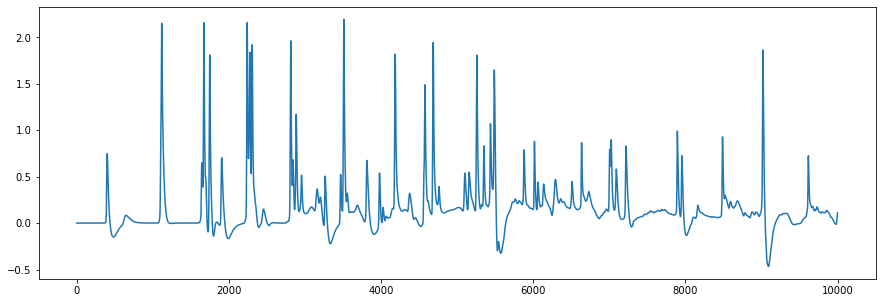

In [20]:
plt.figure(figsize = (15,5))
plt.plot(v[450000:500000][16000:26000])

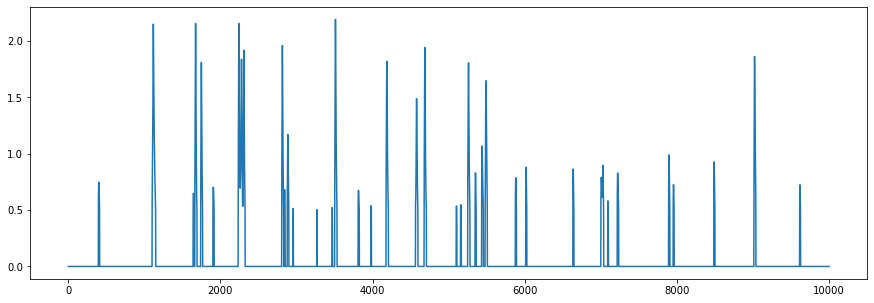

In [21]:
plt.figure(figsize = (15,5))
plt.plot(new_v[450000:500000][16000:26000])